In [1]:
# CSCE590 - Final Exam Program
# Written by James Thompson
#!pip install "gensim==3.8.1"
#!pip install textblob
#!pip install vaderSentiment

In [2]:
# Importing modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import texthero as hero
from textblob import TextBlob
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [3]:
# Reading data: states.csv
data = pd.read_csv("CSCE590 Data/states.csv")
data.head(10)

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
0,2020-01-30,Kerala,1,0,0,0,NaN
1,2020-01-30,India,1,0,0,0,NaN
2,2020-02-02,Kerala,2,0,0,0,NaN
3,2020-02-02,India,2,0,0,0,NaN
4,2020-02-03,Kerala,3,0,0,0,NaN
5,2020-02-03,India,3,0,0,0,NaN
6,2020-02-14,Kerala,3,3,0,0,NaN
7,2020-02-14,India,3,3,0,0,NaN
8,2020-03-02,Delhi,1,0,0,0,NaN
9,2020-03-02,Kerala,3,3,0,0,NaN


In [4]:
delhi_df = data[data.State == "Delhi"]
delhi_df.head(10)

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
8,2020-03-02,Delhi,1,0,0,0,NaN
12,2020-03-03,Delhi,1,0,0,0,NaN
17,2020-03-04,Delhi,1,0,0,0,NaN
24,2020-03-05,Delhi,2,0,0,0,NaN
31,2020-03-06,Delhi,3,0,0,0,NaN
38,2020-03-07,Delhi,3,0,0,0,NaN
47,2020-03-08,Delhi,3,0,0,0,NaN
56,2020-03-09,Delhi,4,0,0,0,NaN
69,2020-03-10,Delhi,4,0,0,0,NaN
82,2020-03-11,Delhi,5,0,0,0,NaN


In [5]:
karna_df = data[data.State == "Karnataka"]
karna_df.head(10)

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
59,2020-03-09,Karnataka,1,0,0,0,NaN
72,2020-03-10,Karnataka,4,0,0,0,NaN
85,2020-03-11,Karnataka,4,0,0,0,NaN
99,2020-03-12,Karnataka,5,0,0,0,NaN
113,2020-03-13,Karnataka,6,0,1,0,NaN
128,2020-03-14,Karnataka,6,0,1,0,NaN
143,2020-03-15,Karnataka,6,0,1,0,NaN
159,2020-03-16,Karnataka,7,0,1,0,NaN
176,2020-03-17,Karnataka,11,0,1,0,NaN
195,2020-03-18,Karnataka,14,0,1,0,NaN


In [6]:
mahar_df = data[data.State == "Maharashtra"]
mahar_df.head(10)

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
62,2020-03-09,Maharashtra,2,0,0,0,NaN
75,2020-03-10,Maharashtra,5,0,0,0,NaN
88,2020-03-11,Maharashtra,11,0,0,0,NaN
102,2020-03-12,Maharashtra,14,0,0,0,NaN
116,2020-03-13,Maharashtra,17,0,0,0,NaN
131,2020-03-14,Maharashtra,26,0,0,0,NaN
146,2020-03-15,Maharashtra,32,0,0,0,NaN
162,2020-03-16,Maharashtra,39,0,0,0,NaN
179,2020-03-17,Maharashtra,41,0,0,0,NaN
198,2020-03-18,Maharashtra,45,0,0,0,NaN


In [7]:
tamil_df = data[data.State == "Tamil Nadu"]
tamil_df.head(10)

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
44,2020-03-07,Tamil Nadu,1,0,0,0,NaN
53,2020-03-08,Tamil Nadu,1,0,0,0,NaN
66,2020-03-09,Tamil Nadu,1,0,0,0,NaN
79,2020-03-10,Tamil Nadu,1,0,0,0,NaN
92,2020-03-11,Tamil Nadu,1,0,0,0,NaN
106,2020-03-12,Tamil Nadu,1,0,0,0,NaN
120,2020-03-13,Tamil Nadu,1,0,0,0,NaN
135,2020-03-14,Tamil Nadu,1,0,0,0,NaN
150,2020-03-15,Tamil Nadu,1,0,0,0,NaN
167,2020-03-16,Tamil Nadu,1,0,0,0,NaN


In [8]:
p1 = data[(data.State == "Telangana")]
p2 = data[data.State == "Andhra Pradesh"]
hyder_df = p1.append(p2, sort=False)
hyder_df = hyder_df.sort_values(by=["Date", "State"])
hyder_df.head(20)

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
10,2020-03-02,Telangana,1,0,0,0,NaN
15,2020-03-03,Telangana,1,0,0,0,NaN
21,2020-03-04,Telangana,1,0,0,0,NaN
28,2020-03-05,Telangana,1,0,0,0,NaN
35,2020-03-06,Telangana,1,0,0,0,NaN
43,2020-03-07,Telangana,1,0,0,0,NaN
52,2020-03-08,Telangana,1,0,0,0,NaN
65,2020-03-09,Telangana,1,0,0,0,NaN
78,2020-03-10,Telangana,1,0,0,0,NaN
91,2020-03-11,Telangana,1,0,0,0,NaN


In [9]:
uttar_df = data[data.State == "Uttar Pradesh"]
uttar_df.head(10)

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
23,2020-03-04,Uttar Pradesh,7,0,0,0,NaN
30,2020-03-05,Uttar Pradesh,8,0,0,0,NaN
37,2020-03-06,Uttar Pradesh,8,0,0,0,NaN
46,2020-03-07,Uttar Pradesh,8,0,0,0,NaN
55,2020-03-08,Uttar Pradesh,8,0,0,0,NaN
68,2020-03-09,Uttar Pradesh,10,0,0,0,NaN
81,2020-03-10,Uttar Pradesh,10,0,0,0,NaN
94,2020-03-11,Uttar Pradesh,10,0,0,0,NaN
108,2020-03-12,Uttar Pradesh,12,0,0,0,NaN
122,2020-03-13,Uttar Pradesh,13,0,0,0,NaN


In [10]:
# List of sorted data for Final:
# Delhi => delhi_df
# Bengaluru => karna_df
# Mumbai => mahar_df
# Chennai => tamil_df
# Hyderabad => hyder_df
# Lucknow => uttar_df

<AxesSubplot:title={'center':'Delhi COVID'}, xlabel='Date', ylabel='Persons'>

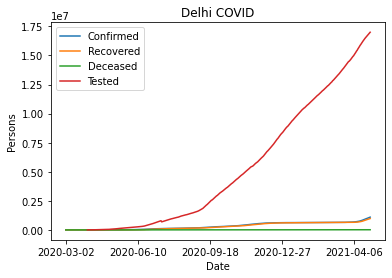

In [11]:
delhi_df.plot(x="Date", y=["Confirmed", "Recovered", "Deceased", "Tested"], title="Delhi COVID", ylabel = "Persons")
#plt.savefig("delhi_covid.png")

<AxesSubplot:title={'center':'Karnataka COVID'}, xlabel='Date', ylabel='Persons'>

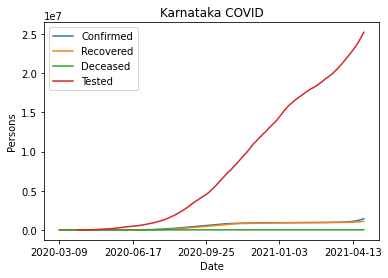

In [12]:
karna_df.plot(x="Date", y=["Confirmed", "Recovered", "Deceased", "Tested"], title="Karnataka COVID", ylabel = "Persons")
#plt.savefig("karnataka_covid.png")

<AxesSubplot:title={'center':'Maharashtra COVID'}, xlabel='Date', ylabel='Persons'>

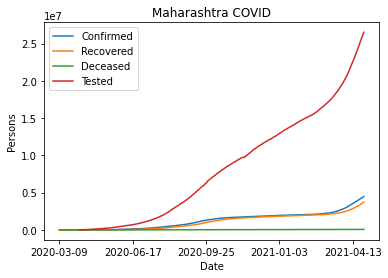

In [13]:
mahar_df.plot(x="Date", y=["Confirmed", "Recovered", "Deceased", "Tested"], title="Maharashtra COVID", ylabel = "Persons")
#plt.savefig("maharashtra_covid.png")

<AxesSubplot:title={'center':'Tamil Nadu COVID'}, xlabel='Date', ylabel='Persons'>

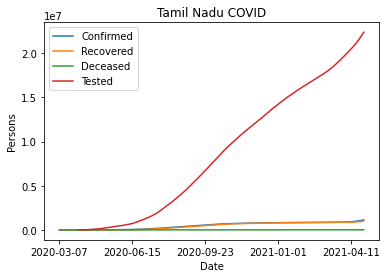

In [14]:
tamil_df.plot(x="Date", y=["Confirmed", "Recovered", "Deceased", "Tested"], title="Tamil Nadu COVID", ylabel = "Persons")
#plt.savefig("tamilnadu_covid.png")

<AxesSubplot:title={'center':'Andhra Pradesh COVID'}, xlabel='Date', ylabel='Persons'>

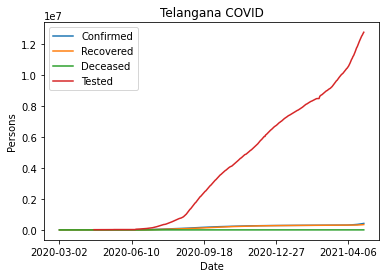

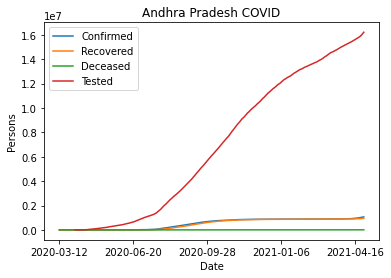

In [15]:
p1.plot(x="Date", y=["Confirmed", "Recovered", "Deceased", "Tested"], title="Telangana COVID", ylabel = "Persons")
#plt.savefig("telangana_covid.png")
p2.plot(x="Date", y=["Confirmed", "Recovered", "Deceased", "Tested"], title="Andhra Pradesh COVID", ylabel = "Persons")
#plt.savefig("andhrapradesh_covid.png")

<AxesSubplot:title={'center':'Uttar Pradesh COVID'}, xlabel='Date', ylabel='Persons'>

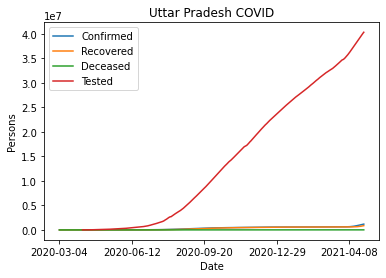

In [16]:
uttar_df.plot(x="Date", y=["Confirmed", "Recovered", "Deceased", "Tested"], title="Uttar Pradesh COVID", ylabel = "Persons")
#plt.savefig("uttarpradesh_covid.png")

In [17]:
# safety = Confirmed/Recovered - Confirmed/Deceased
delhi_safety = (delhi_df.Confirmed.sum()/delhi_df.Recovered.sum()) - (delhi_df.Confirmed.sum()/delhi_df.Deceased.sum())
karna_safety = (karna_df.Confirmed.sum()/karna_df.Recovered.sum()) - (karna_df.Confirmed.sum()/karna_df.Deceased.sum())
mahar_safety = (mahar_df.Confirmed.sum()/mahar_df.Recovered.sum()) - (mahar_df.Confirmed.sum()/mahar_df.Deceased.sum())
tamil_safety = (tamil_df.Confirmed.sum()/tamil_df.Recovered.sum()) - (tamil_df.Confirmed.sum()/tamil_df.Deceased.sum())
hyder_safety = (hyder_df.Confirmed.sum()/hyder_df.Recovered.sum()) - (hyder_df.Confirmed.sum()/hyder_df.Deceased.sum())
uttar_safety = (uttar_df.Confirmed.sum()/uttar_df.Recovered.sum()) - (uttar_df.Confirmed.sum()/uttar_df.Deceased.sum())

In [18]:
delhi_safety

-55.67494187736018

In [19]:
karna_safety

-73.9458111354715

In [20]:
mahar_safety

-40.317251765347585

In [21]:
tamil_safety

-66.08459748184133

In [22]:
hyder_safety

-131.00328595628318

In [23]:
uttar_safety

-69.17004323987881

In [24]:
# Safety Ranking of States/Cities:
# 1. Mumbai
# 2. Delhi
# 3. Chennai
# 4. Lucknow
# 5. Bengaluru
# 6. Hyderabad

In [25]:
articles = pd.read_csv("CSCE590 Data/articles.csv")
articles.head()

,City,Text
0,Delhi,"Covid: Delhi records highest deaths in a day, ..."
1,Bengaluru,Karnataka Bengaluru May 3 Highlights: State re...
2,Mumbai,India: Mumbai COVID lockdown spells trouble fo...
3,Chennai,"Chennai Hyderabad Live Updates: TN reports 21,..."
4,Hyderabad,"With over 5,000 new cases, Telangana records h..."


In [26]:
articles["clean_text"] = hero.clean(articles["Text"])
articles.head()

/home/james/CSCE590/my_project_env/lib/python3.8/site-packages/texthero/preprocessing.py:72: FutureWarning: The default value of regex will change from True to False in a future version.
  return input.str.replace(pattern, symbols)
/home/james/CSCE590/my_project_env/lib/python3.8/site-packages/texthero/preprocessing.py:131: FutureWarning: The default value of regex will change from True to False in a future version.
  return input.str.replace(rf"([{string.punctuation}])+", symbol)


,City,Text,clean_text
0,Delhi,"Covid: Delhi records highest deaths in a day, ...",covid delhi records highest deaths day adminis...
1,Bengaluru,Karnataka Bengaluru May 3 Highlights: State re...,karnataka bengaluru may highlights state repor...
2,Mumbai,India: Mumbai COVID lockdown spells trouble fo...,india mumbai covid lockdown spells trouble bus...
3,Chennai,"Chennai Hyderabad Live Updates: TN reports 21,...",chennai hyderabad live updates tn reports fres...
4,Hyderabad,"With over 5,000 new cases, Telangana records h...",new cases telangana records highest covid spik...


In [27]:
articles["clean_tfidf"] = (articles["Text"].pipe(hero.clean).pipe(hero.tfidf))
articles.head()

/home/james/CSCE590/my_project_env/lib/python3.8/site-packages/texthero/preprocessing.py:72: FutureWarning: The default value of regex will change from True to False in a future version.
  return input.str.replace(pattern, symbols)
/home/james/CSCE590/my_project_env/lib/python3.8/site-packages/texthero/preprocessing.py:131: FutureWarning: The default value of regex will change from True to False in a future version.
  return input.str.replace(rf"([{string.punctuation}])+", symbol)


,City,Text,clean_text,clean_tfidf
0,Delhi,"Covid: Delhi records highest deaths in a day, ...",covid delhi records highest deaths day adminis...,"[0.0502557382303641, 0.0502557382303641, 0.0, ..."
1,Bengaluru,Karnataka Bengaluru May 3 Highlights: State re...,karnataka bengaluru may highlights state repor...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.06295623551709892,..."
2,Mumbai,India: Mumbai COVID lockdown spells trouble fo...,india mumbai covid lockdown spells trouble bus...,"[0.0, 0.0, 0.0, 0.031544130144467414, 0.038467..."
3,Chennai,"Chennai Hyderabad Live Updates: TN reports 21,...",chennai hyderabad live updates tn reports fres...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,Hyderabad,"With over 5,000 new cases, Telangana records h...",new cases telangana records highest covid spik...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.027055119612104783..."


In [28]:
articles["pca"] = (articles["clean_tfidf"].pipe(hero.pca))
articles

,City,Text,clean_text,clean_tfidf,pca
0,Delhi,"Covid: Delhi records highest deaths in a day, ...",covid delhi records highest deaths day adminis...,"[0.0502557382303641, 0.0502557382303641, 0.0, ...","[-0.3557529735703071, -0.2606732346659875]"
1,Bengaluru,Karnataka Bengaluru May 3 Highlights: State re...,karnataka bengaluru may highlights state repor...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.06295623551709892,...","[-0.29451045401983317, 0.16149290330920016]"
2,Mumbai,India: Mumbai COVID lockdown spells trouble fo...,india mumbai covid lockdown spells trouble bus...,"[0.0, 0.0, 0.0, 0.031544130144467414, 0.038467...","[0.8897303864301732, -0.10773736992838236]"
3,Chennai,"Chennai Hyderabad Live Updates: TN reports 21,...",chennai hyderabad live updates tn reports fres...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.024414760073693725, 0.8144110161888579]"
4,Hyderabad,"With over 5,000 new cases, Telangana records h...",new cases telangana records highest covid spik...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.027055119612104783...","[-0.1484318936315995, -0.3678640373532019]"
5,Lucknow,"Lucknow records 3,125 fresh Covid-19 cases, 34...",lucknow records fresh covid cases deaths daily...,"[0.0, 0.0, 0.05362760874940589, 0.087950812656...","[-0.06662030513474196, -0.23962927755048535]"


In [29]:
delhi_article = articles[0:1]
karna_article = articles[1:2]
mahar_article = articles[2:3]
tamil_article = articles[3:4]
hyder_article = articles[4:5]
uttar_article = articles[5:]

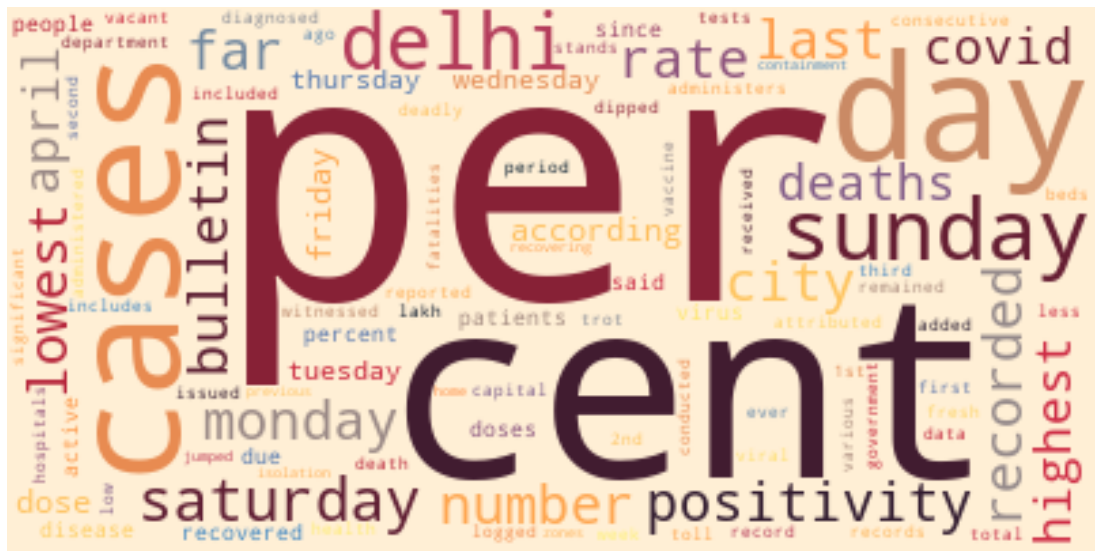

In [30]:
hero.wordcloud(delhi_article["clean_text"])
#plt.savefig("delhi_cloud.png")

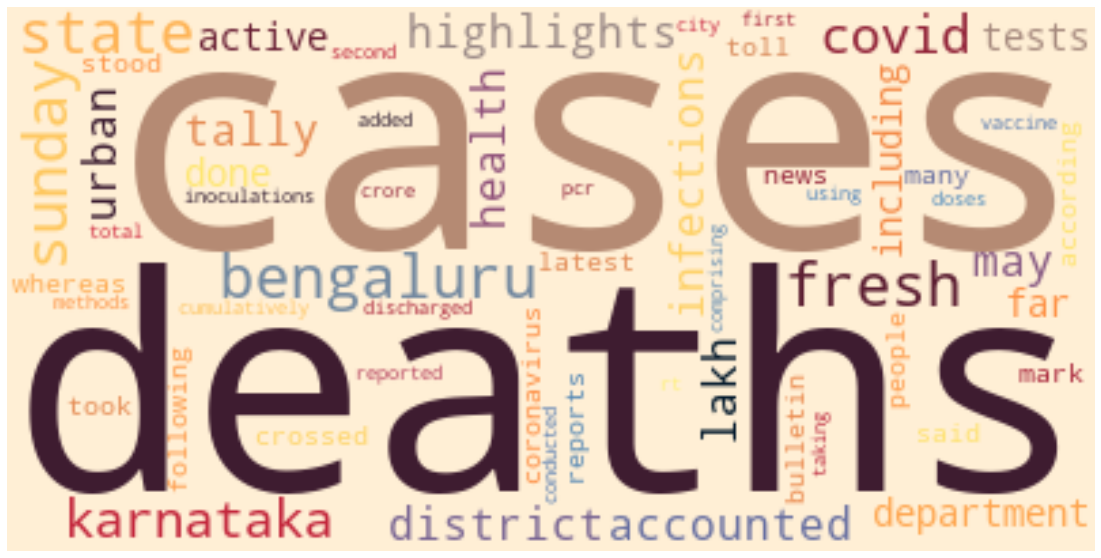

In [31]:
hero.wordcloud(karna_article["clean_text"])
#plt.savefig("karnataka_cloud.png")

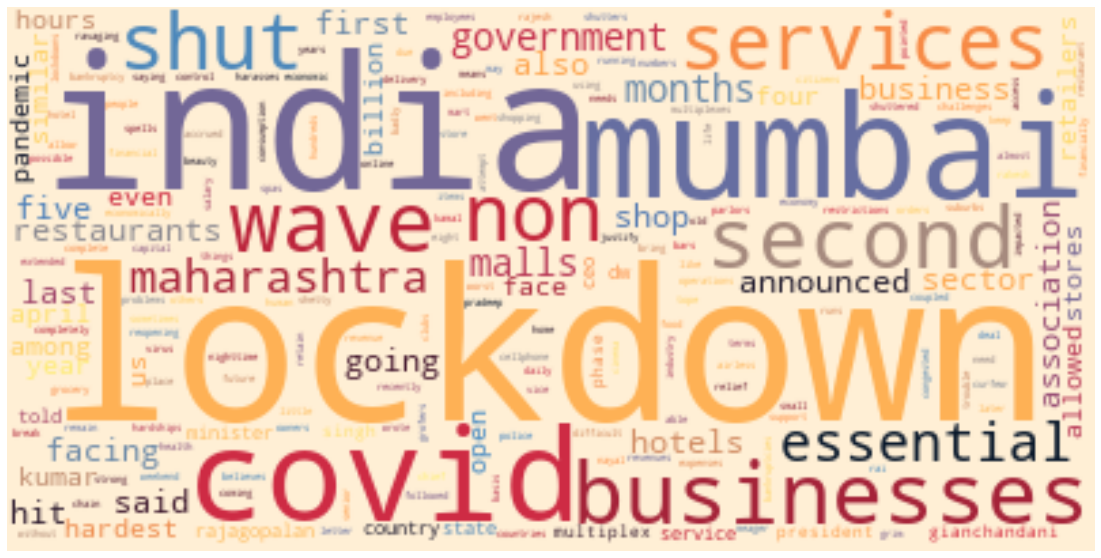

In [32]:
hero.wordcloud(mahar_article["clean_text"])
#plt.savefig("maharashtra_cloud.png")

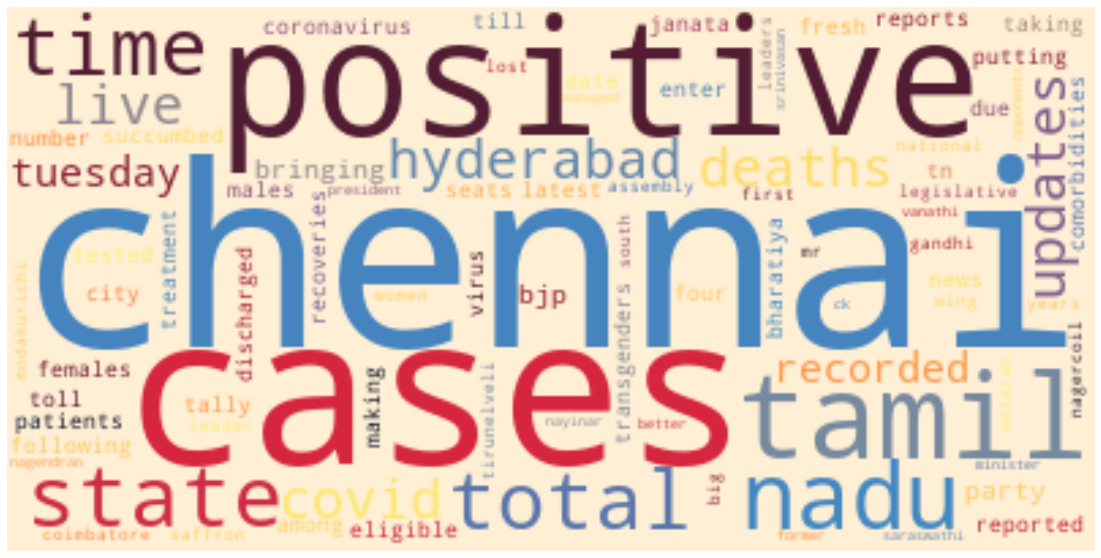

In [33]:
hero.wordcloud(tamil_article["clean_text"])
#plt.savefig("tamilnadu_cloud.png")

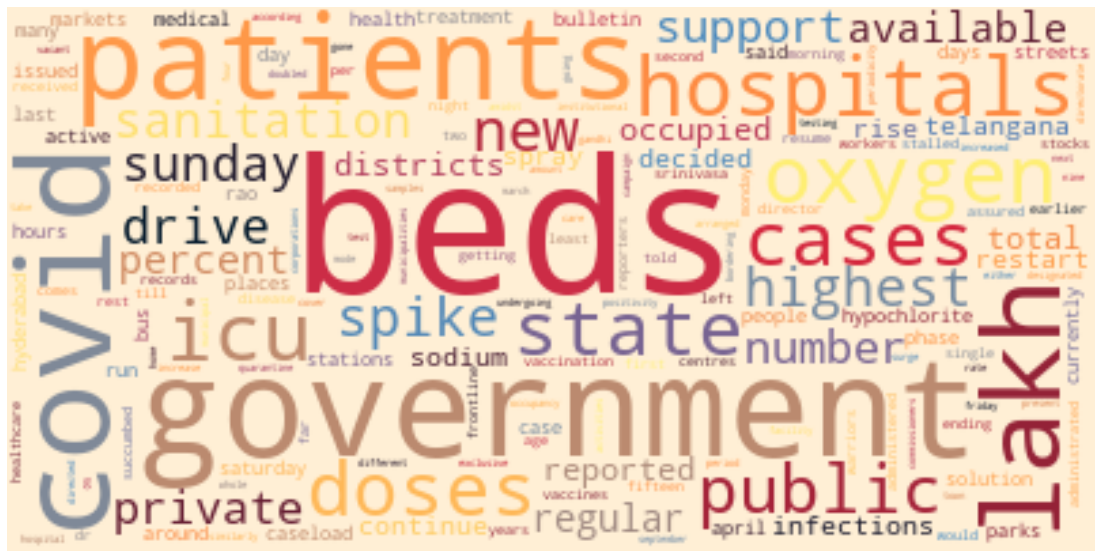

In [34]:
hero.wordcloud(hyder_article["clean_text"])
#plt.savefig("hyderabad_cloud.png")

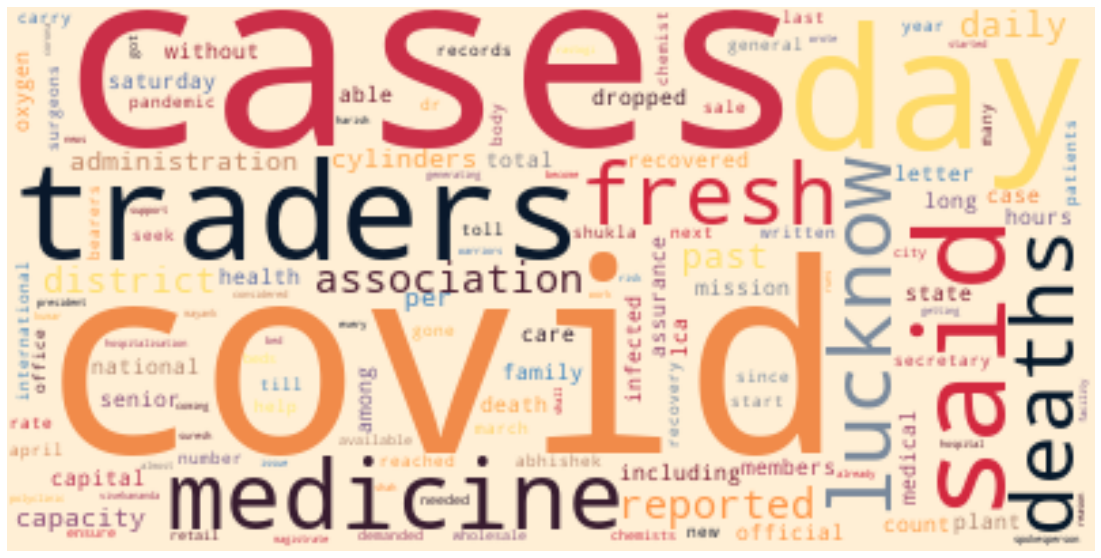

In [35]:
hero.wordcloud(uttar_article["clean_text"])
#plt.savefig("uttarpradesh_cloud.png")

In [36]:
model = TextBlob(articles["Text"][0])
model.sentiment

Sentiment(polarity=0.010576923076923074, subjectivity=0.4657051282051281)

In [37]:
model = TextBlob(articles["Text"][1])
model.sentiment

Sentiment(polarity=0.15324074074074073, subjectivity=0.4810185185185185)

In [38]:
model = TextBlob(articles["Text"][2])
model.sentiment

Sentiment(polarity=-0.07456597222222222, subjectivity=0.39756944444444436)

In [39]:
model = TextBlob(articles["Text"][3])
model.sentiment

Sentiment(polarity=0.13997326203208557, subjectivity=0.4526292335115864)

In [40]:
model = TextBlob(articles["Text"][4])
model.sentiment

Sentiment(polarity=0.07547717434081071, subjectivity=0.32311419640965094)

In [41]:
model = TextBlob(articles["Text"][5])
model.sentiment

Sentiment(polarity=0.1405844155844156, subjectivity=0.34718614718614715)

In [42]:
# NEW Safety metric = (Confirmed/Recovered - Confirmed/Deceased) + (Subjectivity/Polarity)
delhi_sentiment_safety = delhi_safety+(0.4657051282051281/0.010576923076923074)
karna_sentiment_safety = karna_safety+(0.4810185185185185/0.15324074074074073)
mahar_sentiment_safety = mahar_safety+(0.39756944444444436/-0.07456597222222222)
tamil_sentiment_safety = tamil_safety+(0.4526292335115864/0.13997326203208557)
hyder_sentiment_safety = hyder_safety+(0.32311419640965094/0.07547717434081071)
uttar_sentiment_safety = uttar_safety+(0.34718614718614715/0.1405844155844156)

In [43]:
delhi_sentiment_safety

-11.644638847057152

In [44]:
karna_sentiment_safety

-70.80683832580382

In [45]:
mahar_sentiment_safety

-45.64903290620905

In [46]:
tamil_sentiment_safety

-62.85091394156753

In [47]:
hyder_sentiment_safety

-126.72233347983439

In [48]:
uttar_sentiment_safety

-66.70045124603739

In [49]:
# NEW Safety Ranking of States/Cities:
# 1. Delhi
# 2. Mumbai
# 3. Chennai
# 4. Lucknow
# 5. Bengaluru
# 6. Hyderabad